In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon2']
df = pd.read_csv('data.csv', names = days)

In [3]:
# replace absent with the maximum arrival time possible, 6:00 pm, to represent "missed class time"
df['Mon'].loc[df['Mon'].str.contains('absent')] = None

In [4]:
np.array(df).shape

(23, 6)

In [5]:
all_times = np.array(df).reshape(1,23*6)
all_times = pd.DataFrame(all_times.T)

In [6]:
def to_hours(time_as_string):
    try:
        time = time_as_string.split(':')
        time[1] = time[1][:2]
        time = [float(x) for x in time]
        return time[0] + time[1]/60
    except:
        return None

all_times = all_times.applymap(to_hours)


In [7]:
all_times.insert(0, 'day', '')


In [8]:
all_times.columns = ['day','time']
all_times['day'] = all_times.index % 6

In [10]:
all_times = all_times.dropna()


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Distribution of Arrival Times (unsplit by day)')

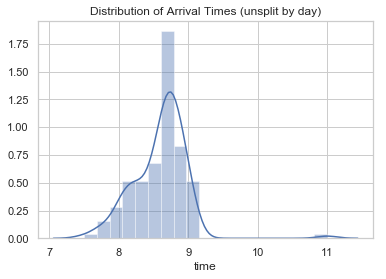

In [15]:
sns.distplot(all_times['time']).set_title('Distribution of Arrival Times (unsplit by day)')

Let's look closer at each individual day.

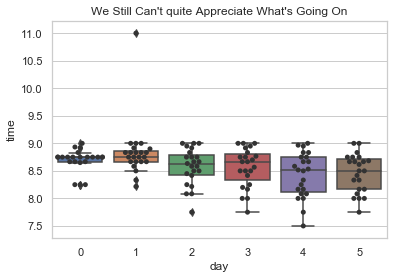

In [11]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x='day', y= 'time', data = all_times).set_title("We Still Can't quite Appreciate What's Going On")
ax = sns.swarmplot(x="day", y="time", data=all_times, color=".2")

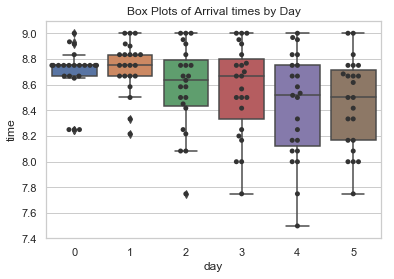

In [12]:
no_outlier = all_times.loc[all_times['time']<10]
ax = sns.boxplot(x='day', y= 'time', data = no_outlier).set_title('Box Plots of Arrival times by Day')
ax = sns.swarmplot(x="day", y="time", data=no_outlier, color=".2")